In [13]:
'1. Giới Thiệu'
'Sau đây là phần demo code nhằm miêu tả hiệu quả của các giải thuật tối ưu khác nhau'


'Sau đây là phần demo code nhằm miêu tả hiệu quả của các giải thuật tối ưu khác nhau'

In [14]:
'1. Import packages'

'1. Import packages'

In [68]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
sns.set(style = 'white', context = 'notebook', palette = 'deep')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Lambda
from keras.optimizers import RMSprop, SGD, Adagrad, Adam, Adadelta  
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot
from math import pi
from math import cos
from math import floor
from keras.callbacks import Callback
from keras import backend
from numpy import argmax
from subprocess import check_output
from keras.layers import Convolution2D, MaxPooling2D
import keras
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import copy

In [16]:
tf.__version__


'2.1.0'

In [17]:
keras.__version__


'2.3.1'

In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8664788287220267561
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6614579282
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1505064430087050890
physical_device_desc: "device: 0, name: GeForce RTX 2060 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5"
]


In [19]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [20]:
'2. Load dữ liệu'

'2. Load dữ liệu'

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [22]:
'3. Khám phá dữ liêu'

'3. Khám phá dữ liêu'

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [24]:
print('Training shape: {}'.format(train.shape))


Training shape: (42000, 785)


In [25]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
print('Test shape: {}'.format(test.shape))

Test shape: (28000, 784)


In [27]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
trainX = (train.iloc[:,1:].values).astype('float32')
trainY = (train.iloc[:, 0]).values.astype('float32')
testX = test.values.astype('float32')
#del train


In [29]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
trainY

array([1., 0., 1., ..., 7., 6., 9.], dtype=float32)

In [31]:
Y = train['label']
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

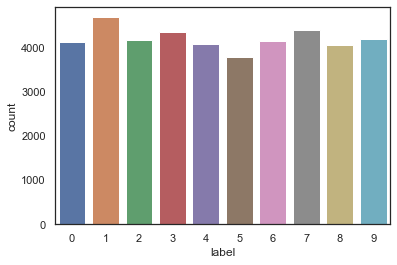

In [32]:
plot = sns.countplot(Y)



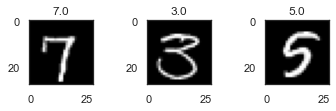

In [33]:
trainX = trainX.reshape(trainX.shape[0], 28, 28)
for i in range(6,9):
    plt.subplot(330 + (i+1))
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    plt.title(trainY[i])

In [34]:
'4. Tiền Xử lý dữ liệu'

'4. Tiền Xử lý dữ liệu'

In [35]:
trainX = trainX.reshape(-1,28,28,1)
trainX.shape

(42000, 28, 28, 1)

In [36]:
testX = testX.reshape(-1,28,28,1)
testX.shape

(28000, 28, 28, 1)

In [37]:
meanX = trainX.mean().astype(np.float32)
std_X = trainX.std().astype(np.float32)

In [38]:
def standardization(x):
    return (x-meanX)/std_X

In [39]:
trainY = to_categorical(trainY, num_classes = 10)
classes = trainY.shape[1]
classes

10

In [40]:
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.10, random_state=2)

In [41]:
trainX.shape

(37800, 28, 28, 1)

In [42]:
testX.shape


(4200, 28, 28, 1)

In [43]:
trainY.shape


(37800, 10)

In [44]:
testY.shape


(4200, 10)

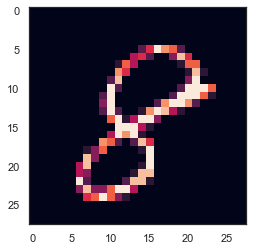

In [45]:
g = plt.imshow(trainX[0][:,:,0])


In [46]:
datagen = ImageDataGenerator(featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)


In [47]:
datagen.fit(trainX)


In [48]:
type(datagen)

keras.preprocessing.image.ImageDataGenerator

In [49]:
trainX.shape

(37800, 28, 28, 1)

In [50]:
'5. Xây dựng model'

'5. Xây dựng model'

In [51]:
## Architechture

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [52]:
model1 = copy.deepcopy(model)
model2 = copy.deepcopy(model)
model3 = copy.deepcopy(model)
model4 = copy.deepcopy(model)
model5 = copy.deepcopy(model)



In [53]:
## Model parameters

epochs = 60 ## We keep it low for minimum training time. Increase if better performance is needed.
batch_size = 32
verbose = 2
step_per_epoch = trainX.shape[0] // batch_size
loss = 'categorical_crossentropy'
learning_rate = 0.1

In [54]:
Momentum_opti = SGD(lr= learning_rate, momentum = 0.9, nesterov = False)


In [55]:
Adagrad_opti = Adagrad(lr = learning_rate)

In [56]:
Adadelta_opti = Adadelta(lr = learning_rate, rho = 0.9)

In [57]:
RMSProp_opti = RMSprop(lr = learning_rate, rho = 0.9)


In [58]:
Adam_opti = Adam(lr = learning_rate, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

In [59]:
"Train model using SGD"

'Train model using SGD'

In [60]:
model.compile(optimizer = Momentum_opti, loss = loss, metrics = ["accuracy"])


In [61]:
    mcp = keras.callbacks.ModelCheckpoint("model_CNN_SGD.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [62]:
## Training Time!
history = model.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

Epoch 1/60
 - 9s - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0979

Epoch 00001: val_accuracy improved from -inf to 0.09786, saving model to model_CNN_SGD.h5
Epoch 2/60
 - 7s - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0979

Epoch 00002: val_accuracy did not improve from 0.09786
Epoch 3/60
 - 7s - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0979

Epoch 00003: val_accuracy did not improve from 0.09786
Epoch 4/60
 - 7s - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0979

Epoch 00004: val_accuracy did not improve from 0.09786
Epoch 5/60
 - 7s - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0979

Epoch 00005: val_accuracy did not improve from 0.09786
Epoch 6/60
 - 7s - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0979

Epoch 00006: val_accuracy did not improve from 0.09786
Epoch 7/60
 - 7s - loss: nan - accuracy: 0.0983 - val_loss: nan - val_accuracy: 0.0979

Epoch 00007: val_ac

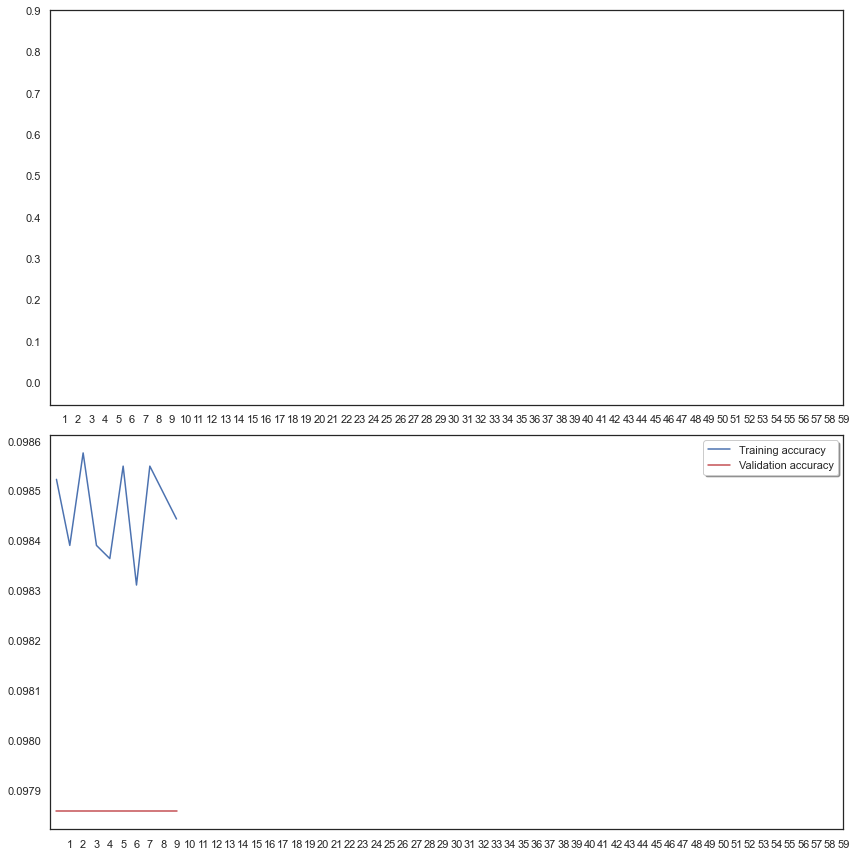

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [64]:
'Train model using Adagrad'

'Train model using Adagrad'

In [65]:
model1.compile(optimizer = Adagrad_opti, loss = loss, metrics = ["accuracy"])


In [66]:
mcp = keras.callbacks.ModelCheckpoint("model_CNN_Adagrad.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [67]:
## Training Time!

history = model1.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

Epoch 1/60
 - 7s - loss: 4156.9095 - accuracy: 0.1092 - val_loss: 2.3010 - val_accuracy: 0.1155

Epoch 00001: val_accuracy improved from -inf to 0.11548, saving model to model_CNN_Adagrad.h5
Epoch 2/60
 - 7s - loss: 2.3015 - accuracy: 0.1107 - val_loss: 2.3010 - val_accuracy: 0.1155

Epoch 00002: val_accuracy did not improve from 0.11548
Epoch 3/60
 - 7s - loss: 2.3016 - accuracy: 0.1108 - val_loss: 2.3011 - val_accuracy: 0.1155

Epoch 00003: val_accuracy did not improve from 0.11548
Epoch 4/60
 - 7s - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3016 - val_accuracy: 0.1155

Epoch 00004: val_accuracy did not improve from 0.11548
Epoch 5/60
 - 7s - loss: 2.3015 - accuracy: 0.1112 - val_loss: 2.3011 - val_accuracy: 0.1155

Epoch 00005: val_accuracy did not improve from 0.11548
Epoch 6/60
 - 7s - loss: 2.3014 - accuracy: 0.1109 - val_loss: 2.3015 - val_accuracy: 0.1155

Epoch 00006: val_accuracy did not improve from 0.11548
Epoch 7/60
 - 7s - loss: 2.3015 - accuracy: 0.1113 - val_loss: 2

KeyboardInterrupt: 

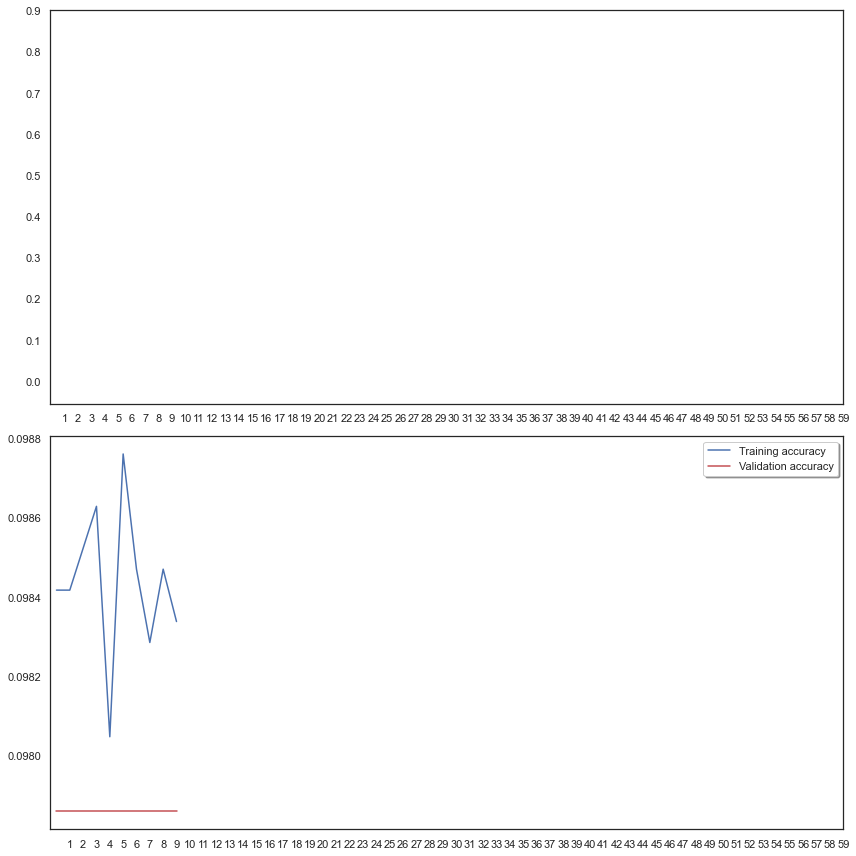

In [210]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [212]:
'Train model using Adadelta'

'Train model using Adadelta'

In [213]:
model2.compile(optimizer = Adadelta_opti, loss = loss, metrics = ["accuracy"])
mcp = keras.callbacks.ModelCheckpoint("model_CNN_Adadelta.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [214]:
## Training Time!

history = model2.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

Epoch 1/60
 - 7s - loss: 1.5484 - accuracy: 0.5920 - val_loss: 0.1390 - val_accuracy: 0.9593

Epoch 00001: val_accuracy improved from -inf to 0.95929, saving model to model_CNN_Adadelta.h5
Epoch 2/60
 - 7s - loss: 0.3650 - accuracy: 0.8836 - val_loss: 0.0809 - val_accuracy: 0.9752

Epoch 00002: val_accuracy improved from 0.95929 to 0.97524, saving model to model_CNN_Adadelta.h5
Epoch 3/60
 - 7s - loss: 0.2303 - accuracy: 0.9289 - val_loss: 0.0732 - val_accuracy: 0.9786

Epoch 00003: val_accuracy improved from 0.97524 to 0.97857, saving model to model_CNN_Adadelta.h5
Epoch 4/60
 - 7s - loss: 0.1776 - accuracy: 0.9445 - val_loss: 0.0571 - val_accuracy: 0.9819

Epoch 00004: val_accuracy improved from 0.97857 to 0.98190, saving model to model_CNN_Adadelta.h5
Epoch 5/60
 - 7s - loss: 0.1532 - accuracy: 0.9545 - val_loss: 0.0487 - val_accuracy: 0.9867

Epoch 00005: val_accuracy improved from 0.98190 to 0.98667, saving model to model_CNN_Adadelta.h5
Epoch 6/60
 - 7s - loss: 0.1277 - accuracy:

KeyboardInterrupt: 

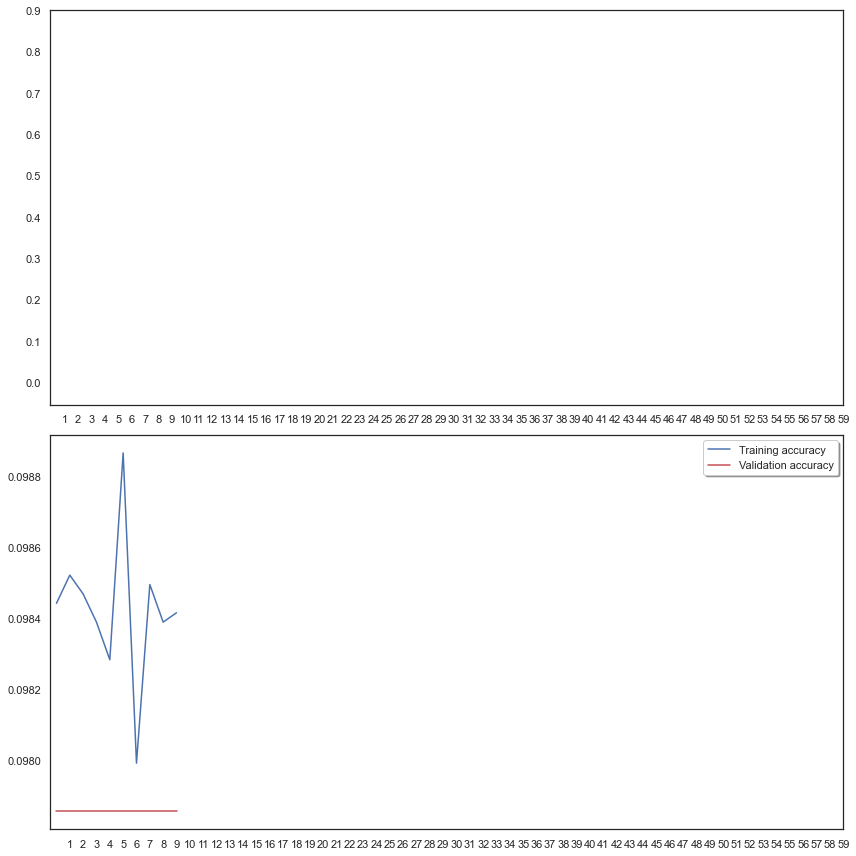

In [137]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [139]:
'Train model using RMSProp'

'Train model using RMSProp'

In [140]:
model3.compile(optimizer = RMSProp_opti, loss = loss, metrics = ["accuracy"])
mcp = keras.callbacks.ModelCheckpoint("model_CNN_RMSProp.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [141]:
## Training Time!

history = model3.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

ValueError: An operation has `None` for gradient. Please make sure that all of your ops have a gradient defined (i.e. are differentiable). Common ops without gradient: K.argmax, K.round, K.eval.

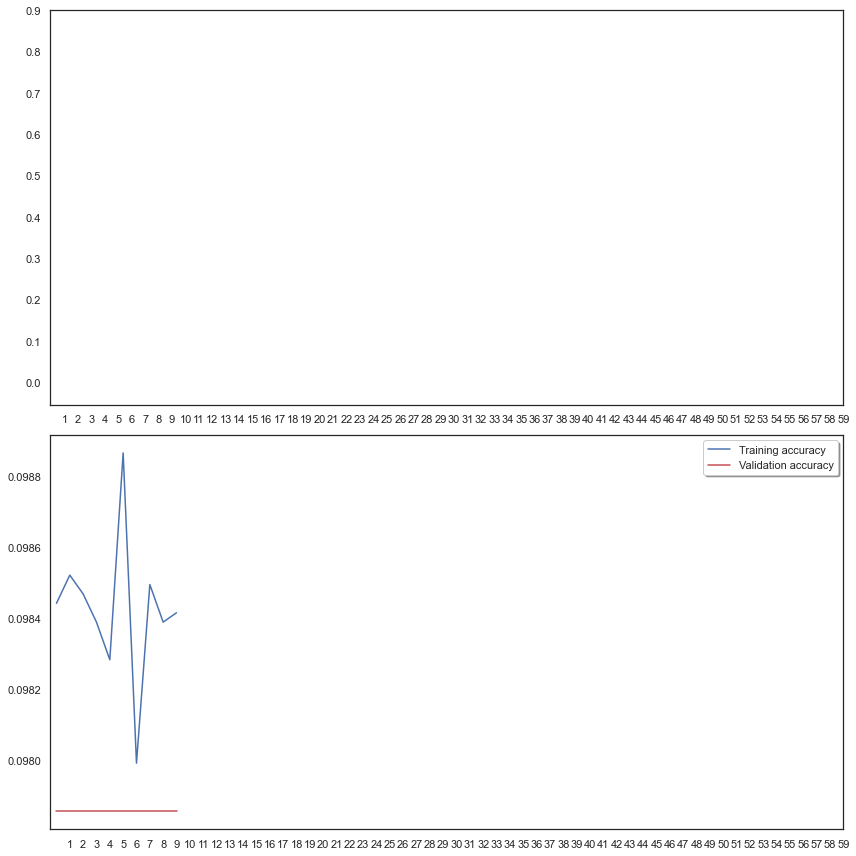

In [142]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [144]:
model4.compile(optimizer = RMSProp_opti, loss = loss, metrics = ["accuracy"])
mcp = keras.callbacks.ModelCheckpoint("model_CNN_RMSProp.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [145]:
'Train model using Adam'

'Train model using Adam'

In [146]:
model4.compile(optimizer = Adam_opti, loss = loss, metrics = ["accuracy"])
mcp = keras.callbacks.ModelCheckpoint("model_CNN_Adam.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [147]:

history = model4.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

ValueError: An operation has `None` for gradient. Please make sure that all of your ops have a gradient defined (i.e. are differentiable). Common ops without gradient: K.argmax, K.round, K.eval.

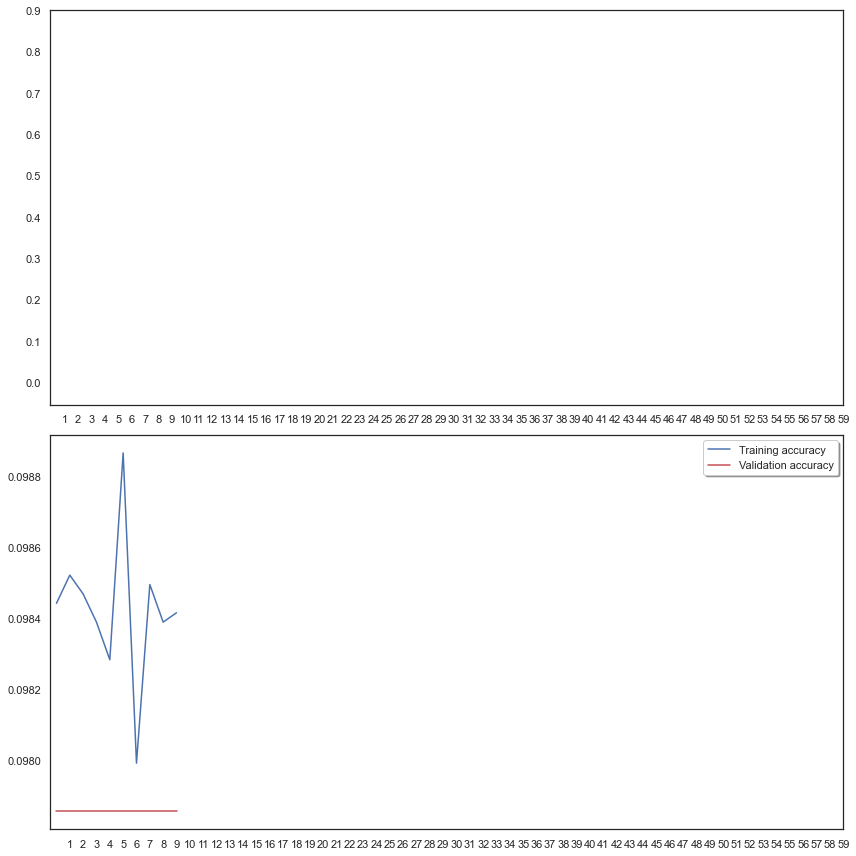

In [148]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [149]:
_, train_acc = model.evaluate(trainX, trainY, verbose = 0)


ValueError: Cannot create an execution function which is comprised of elements from multiple graphs.

In [150]:
_, test_acc = model.evaluate(testX, testY, verbose = 0)


ValueError: Cannot create an execution function which is comprised of elements from multiple graphs.

In [151]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.111, Test: 0.115


In [152]:
predictions = model.predict_classes(testX, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})

submissions.to_csv("DR.csv", index=False, header=True)

ValueError: Cannot create an execution function which is comprised of elements from multiple graphs.